In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import math

mpl.rcParams['text.color'] = 'red'
mpl.rcParams['xtick.color'] = 'r'
mpl.rcParams['ytick.color'] = 'r'
mpl.rcParams['axes.labelcolor'] = 'red'


---
# Projections in R^2
---

beta : 0.4482758620689655


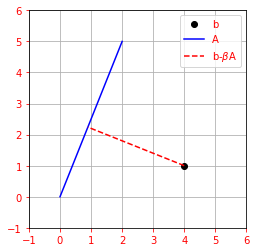

In [4]:
# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
# beta = (a.T @ b)/ (np.linalg.norm(a) * np.linalg.norm(a))
beta = (a.T @ b)/ (a @ a.T)
print('beta :', beta)

# draw
plt.plot(b[0], b[1], 'ko', label='b')
plt.plot([0, a[0]], [0, a[1]],'b', label='A')
plt.plot([b[0], beta*a[0]], [b[1], beta*a[1]],'r--', label=r'b-$\beta$A')
plt.grid()
plt.axis('square')
plt.legend()
plt.axis((-1, 6, -1, 6))
plt.show()


---
# projections in R^N
---


In [5]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m, 1)

# matrix A
A = np.random.randn(m, n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T @ A) @ (A.T @ b)

# python solution (better method)
x2 = np.linalg.solve(A.T @ A, A.T @ b)

# show that the results are the same
print(np.round(x1.T, 3))
print(np.round(x2.T, 3))

[[ 0.269 -0.054  0.126 -0.03  -0.016  0.003 -0.295 -0.143 -0.64  -0.085]]
[[ 0.269 -0.054  0.126 -0.03  -0.016  0.003 -0.295 -0.143 -0.64  -0.085]]


In [6]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m, 1)

# matrix A
A = np.random.randn(m, n)

x = np.linalg.solve(A.T @ A, A.T @ b)
# A @ beta
Ax = A @ x
print(b.T)
print(Ax.T)

[[ 1.70229305 -1.84457218 -0.10140948]]
[[ 1.46910042 -2.01072845 -0.15586764]]


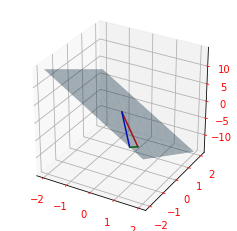

In [7]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

---
### Code challange: decompose vector to orthogonal components
---

dot product 0.0
[0. 0.]


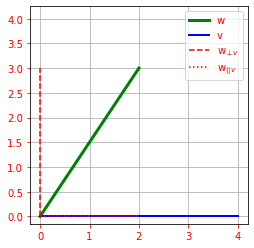

In [8]:
# vector w, to be decomposed
w = np.array([2 ,3])

# vector v, refrence vector
v = np.array([4, 0])

# compute beta
beta = (v.T @ w)/(v.T @ v)

# compute w parallel to v
w_parallel_v = beta * v

# compute w orthogonal to v
w_orthogonal_v = w - w_parallel_v

# confirm results algebrically ( sum to w, orthogonal components)
print('dot product', w_parallel_v.T @ w_orthogonal_v)
print(w_parallel_v + w_orthogonal_v - w)
# plot all the four vectors
plt.plot([0, w[0]], [0, w[1]], 'g', label='w', linewidth=3)
plt.plot([0, v[0]], [0, v[1]], 'b', label='v', linewidth=2)
plt.plot([0, w_orthogonal_v[0]], [0, w_orthogonal_v[1]], 'r--', label='w$_{\perp v}$')
plt.plot([0, w_parallel_v[0]], [0, w_parallel_v[1]], 'r:', label='w$_{|| v}$')
plt.grid()
plt.axis('square')
plt.legend()
plt.show()


---
# QR decomposition
---


In [9]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
# "economy" QR decomposition
Q, R = np.linalg.qr(A, 'complete')
print(Q), print(' ')

# "economy" QR decomposition
Q, R = np.linalg.qr(A)
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [10]:
# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], 
               [3,-1, 1] ] )

Q, R = np.linalg.qr(M, 'complete')
print('R from QR: ')
print(np.round(R, 4))
print(' ')
print('R from Q^TM: ')
print(np.round(Q.T @ M, 4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
 
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


[]

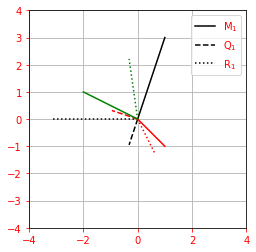

In [11]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

---
### Code challenge: Gram-Schmidt algorithm
---

In [12]:
def projection(dec_vec, ref_vec):
    beta = np.dot(ref_vec, dec_vec)/np.dot(ref_vec, ref_vec)
    dec_parallel_ref = beta * ref_vec
    dec_perpendicular_ref = dec_vec - dec_parallel_ref
    return dec_parallel_ref, dec_perpendicular_ref

In [13]:
def qr(mat):
    Q = np.zeros((mat.shape))
    Q[:,0] =  mat[:, 0] / np.linalg.norm(mat[:, 0])
    for i in range(1, mat.shape[1]):
        Q[:, i] = mat[:, i]
        j = i-1
        while j >= 0:
            par, per = projection(mat[:,i], Q[:,j])
            Q[:, i] = Q[:, i] - par
            j -= 1
        Q[:, i] = Q[:, i]/np.linalg.norm(Q[:, i])
    R = np.round(Q.T @ mat, 6)
    return Q, R

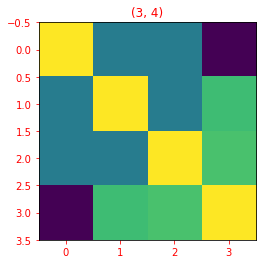

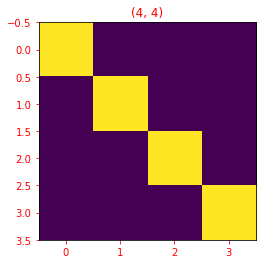

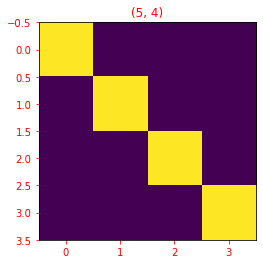

In [14]:
for i in [3, 4, 5]:
    m = i
    n = 4
    M = np.random.randn(m, n)
    Q, R = qr(M)

    plt.imshow(Q.T @ Q)
    plt.title(f'{m ,n}')
    plt.show()

In [15]:
Q2, R2 = np.linalg.qr(M, 'complete')
print(Q2)
print('-'*40)
print(R2)

[[-0.16044373  0.19404919 -0.18314945 -0.93151373 -0.18799248]
 [ 0.15904416 -0.05317067 -0.6566557   0.23148852 -0.69792134]
 [ 0.97353535  0.04007053  0.05121811 -0.1910474   0.10724216]
 [ 0.02838657  0.57069355  0.59205614  0.11010727 -0.55753834]
 [ 0.01964431 -0.79512327  0.42673857 -0.1734143  -0.39397303]]
----------------------------------------
[[ 1.79570813 -0.6995468   1.44043143 -0.33819065]
 [ 0.          2.48450362  0.44183569  0.6119662 ]
 [ 0.          0.         -1.90173913 -2.95930816]
 [ 0.          0.          0.          2.16264054]
 [ 0.          0.          0.          0.        ]]


In [16]:
print(Q) # 3, 2 X 2, 3
print('-'*40)
print(R)
print('-'*40)
print(np.round(Q.T @ Q), 5)
# here we can see that linalg.qr added one more col because it is possible to add one more
# col which is orthogonal to all cols

[[-0.16044373  0.19404919  0.18314945 -0.93151373]
 [ 0.15904416 -0.05317067  0.6566557   0.23148852]
 [ 0.97353535  0.04007053 -0.05121811 -0.1910474 ]
 [ 0.02838657  0.57069355 -0.59205614  0.11010727]
 [ 0.01964431 -0.79512327 -0.42673857 -0.1734143 ]]
----------------------------------------
[[ 1.795708 -0.699547  1.440431 -0.338191]
 [-0.        2.484504  0.441836  0.611966]
 [ 0.       -0.        1.901739  2.959308]
 [-0.        0.       -0.        2.162641]]
----------------------------------------
[[ 1. -0.  0. -0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1. -0.]
 [-0.  0. -0.  1.]] 5


---
### Code challange: inverse via QR
---

In [17]:
def qr_inv(M):
    Q = np.zeros(M.shape)
    Q[:,0] = M[:,0]/np.linalg.norm(M[:,0])
    for i in range(1, M.shape[1]):
        j = i-1
        Q[:,i] = M[:,i]
        while j >= 0:
            Q[:,i] -=((np.dot(M[:,i], Q[:,j])/np.dot(Q[:,j], Q[:,j])) * Q[:,j])
            j -= 1
        Q[:,i] = Q[:,i]/np.linalg.norm(Q[:,i])
    R = Q.T @ M
    #M_inv = np.linalg.solve(R, Q.T)
    M_inv = np.linalg.inv(R) @ Q.T
    return M_inv, Q, R

In [18]:
n = 100
M = np.random.randn(n, n)
M_inv1, Q, R = qr_inv(M)
Q1, R1 = np.linalg.qr(M)
# using solve for getting inverse
M_inv2 = np.linalg.solve(R1, Q1.T)

# using linalg.inv for inverse
M_inv3 = np.linalg.inv(M)

In [19]:
np.round(M_inv1 - M_inv2, 6)

array([[ 0.,  0.,  0., ..., -0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -0.,  0., -0.],
       [ 0.,  0., -0., ...,  0., -0., -0.],
       ...,
       [-0., -0.,  0., ..., -0., -0.,  0.],
       [ 0.,  0.,  0., ..., -0.,  0., -0.],
       [-0., -0.,  0., ..., -0., -0.,  0.]])

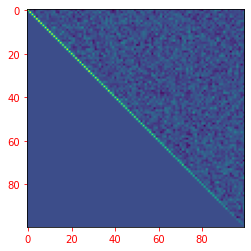

In [20]:
plt.imshow(R)
plt.show()

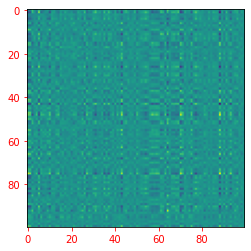

In [21]:
plt.imshow(M_inv1)
plt.show()

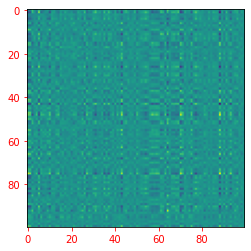

In [22]:
plt.imshow(M_inv2)
plt.show()

In [23]:
np.corrcoef((M_inv1.flatten(), M_inv2.flatten(), M_inv3.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
A = np.random.randn(2,6)
print(A)
A1 = A[:,0:2]
print(' ')
print(A1)
A2 = A[:,2:4]
# A2 = A1 * 10
print(' ')
print(A2)
A3 = A[:,4:6]
# A3 = A1 * 20 
print(' ')
print(A3)
print(' ')
print(np.corrcoef((A1.flatten(), A2.flatten(), A3.flatten())))

[[-0.67196963 -0.77744849 -0.7823927   1.68384849  0.16461888  1.10025229]
 [-2.58092607  0.27498564  0.51135434  1.18226818 -1.09948793  1.39325266]]
 
[[-0.67196963 -0.77744849]
 [-2.58092607  0.27498564]]
 
[[-0.7823927   1.68384849]
 [ 0.51135434  1.18226818]]
 
[[ 0.16461888  1.10025229]
 [-1.09948793  1.39325266]]
 
[[1.         0.17225573 0.92574688]
 [0.17225573 1.         0.49971828]
 [0.92574688 0.49971828 1.        ]]


---
### Code challange: Prove and demonstrate the Sherman-Morrison inverse
---

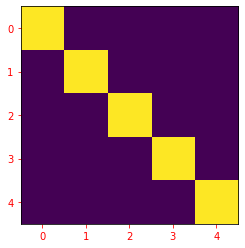

In [25]:
m = 5
a = np.random.randn(m)
b = np.random.randn(m)
A = np.eye(m) - np.outer(a, b) 
A_inv = np.eye(m) + np.outer(a, b)/(1-np.dot(a, b))
plt.imshow(np.round(A @ A_inv, 6))
plt.show()

---
### Sherman-Morrison inverse Failure case
---

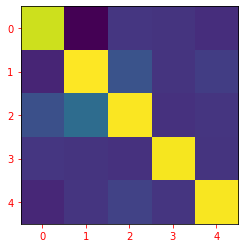

In [26]:
a /= np.linalg.norm(a)
b = a
A = np.eye(m) - np.outer(a, b)
A_inv = np.eye(m) + np.outer(a, b)/(1-np.dot(a,b))
plt.imshow(np.round(A @ A_inv, 6))
plt.show()
# Here we can see that the matrix is not an Identity matrix

---
### Code challange: A^TA = R^TR
---

In [52]:
def get_R(M):
    Q = np.zeros(M.shape)
    Q[:,0] = M[:,0]/np.linalg.norm(M[:,0])
    for i in range(1, M.shape[1]):
        j = i-1
        Q[:,i] = M[:,i]
        while j >= 0:
            beta = (np.dot(Q[:,j], M[:,i])/np.dot(Q[:,j],Q[:,j]))
            Q[:,i] -= beta*Q[:,j]
            j -= 1
        Q[:,i] =Q[:,i]/ np.linalg.norm(Q[:,i])
    R = Q.T @ M
    return R

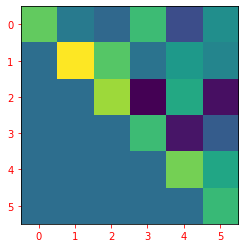

In [60]:
m = 10
n = 6
A = np.random.randn(m, n)
# QR = A [to-do]
R = get_R(A)
plt.imshow(R)
plt.show()

In [61]:
AtA = A.T @ A
RtR = R.T @ R

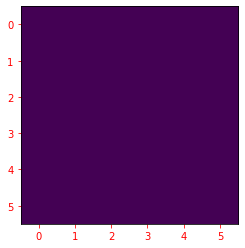

In [62]:
plt.imshow(np.round(AtA - RtR, 6))
plt.show()

In [63]:
R.shape

(6, 6)